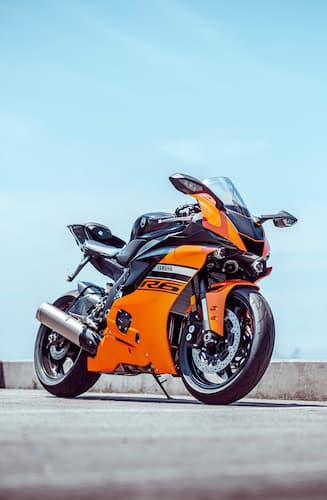

You're working for a company that sells motorcycle parts, and they've asked for some help in analyzing their sales data!

They operate three warehouses in the area, selling both retail and wholesale. They offer a variety of parts and accept credit cards, cash, and bank transfer as payment methods. However, each payment type incurs a different fee.

The board of directors wants to gain a better understanding of wholesale revenue by product line, and how this varies month-to-month and across warehouses. You have been tasked with calculating net revenue for each product line and grouping results by month and warehouse. The results should be filtered so that only `"Wholesale"` orders are included.

They have provided you with access to their database, which contains the following table called `sales`:

## Sales
| Column | Data type | Description |
|--------|-----------|-------------|
| `order_number` | `VARCHAR` | Unique order number. |
| `date` | `DATE` | Date of the order, from June to August 2021. |
| `warehouse` | `VARCHAR` | The warehouse that the order was made from&mdash; `North`, `Central`, or `West`. |
| `client_type` | `VARCHAR` | Whether the order was `Retail` or `Wholesale`. |
| `product_line` | `VARCHAR` | Type of product ordered. |
| `quantity` | `INT` | Number of products ordered. | 
| `unit_price` | `FLOAT` | Price per product (dollars). |
| `total` | `FLOAT` | Total price of the order (dollars). |
| `payment` | `VARCHAR` | Payment method&mdash;`Credit card`, `Transfer`, or `Cash`. |
| `payment_fee` | `FLOAT` | Percentage of `total` charged as a result of the `payment` method. |


Your query output should be presented in the following format:

| `product_line` | `month` | `warehouse` |	`net_revenue` |
|----------------|-----------|----------------------------|--------------|
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_two | --- | --- | --- |
| ... | ... | ... | ... |

Create a query to return `product_line`, the `month` from `date`, displayed as `'June'`, `'July'`, and `'August'`, the `warehouse`, and `net_revenue`.

- `net_revenue` is calculated by getting the sum of `total` and multiplying by `1 - payment_fee`, rounding to two decimal places.

- You will need to filter `client_type` so that only `'Wholesale'` orders are returned.

- The results should first be sorted by `product_line` and `month` in ascending order, then by `net_revenue` in descending order.

In [11]:
SELECT * FROM sales

,order_number,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,payment_fee
0,N1,2021-06-01 00:00:00+00:00,North,Retail,Breaking system,9,19.29,173.61,Cash,0.00
1,N2,2021-06-01 00:00:00+00:00,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,0.03
2,N3,2021-06-01 00:00:00+00:00,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,0.01
3,N4,2021-06-01 00:00:00+00:00,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer,0.01
4,N5,2021-06-01 00:00:00+00:00,North,Retail,Frame & body,6,45.44,272.61,Credit card,0.03
...,...,...,...,...,...,...,...,...,...,...
995,W176,2021-08-27 00:00:00+00:00,West,Retail,Electrical system,4,21.47,85.89,Credit card,0.03
996,W177,2021-08-28 00:00:00+00:00,West,Wholesale,Miscellaneous,32,25.42,813.44,Transfer,0.01
997,W178,2021-08-28 00:00:00+00:00,West,Retail,Electrical system,6,28.37,170.21,Credit card,0.03
998,W179,2021-08-28 00:00:00+00:00,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,0.01


In [12]:
SELECT product_line, 
	CASE WHEN EXTRACT(MONTH FROM date) = 6 THEN 'June'
		WHEN EXTRACT(MONTH FROM date) = 7 THEN 'July'
		WHEN EXTRACT(MONTH FROM date) = 8 THEN 'August'
	END AS month,
	warehouse,
	ROUND(SUM(total * (1 - payment_fee))::numeric, 2) AS net_revenue
FROM sales
WHERE client_type = 'Wholesale'
GROUP BY product_line, warehouse, month
ORDER BY product_line, month, net_revenue DESC

,product_line,month,warehouse,net_revenue
0,Breaking system,August,Central,3009.10
1,Breaking system,August,West,2475.71
2,Breaking system,August,North,1753.19
3,Breaking system,July,Central,3740.94
4,Breaking system,July,West,3030.39
5,Breaking system,July,North,2568.55
6,Breaking system,June,Central,3648.14
7,Breaking system,June,North,1472.93
8,Breaking system,June,West,1200.64
9,Electrical system,August,North,4673.99
